In [1]:
import numpy as np
import matplotlib.pyplot as plt
from generate import generate_vertex, generate_activation, generate_masked_sac
from sac import calculate_sac, masked_sac

from gtda.homology import CubicalPersistence
from gtda.plotting import plot_diagram
import gtda.diagrams as dg
import gtda.plotting as gplot


from ripser import lower_star_img

In [2]:
#center
v0 = np.array([0,0])

#vectors for square grid
v1s = np.array([0,1])
v2s = np.array([1,0])

#vectors for triangular grid
v1t = np.array([1,0])
yt = np.sqrt(1**2-0.5**2)
v2t = np.array([0.5,yt])

vl = np.array([0,0.45])

In [3]:
square_grid = generate_masked_sac(v0,v1s,v2s,[-2,3])
triangular_grid = generate_masked_sac(v0,v1t,v2t,[-2,3])
linesv = generate_vertex(v0,v0,vl,[-2,3])
linesv = linesv[:5]
linesm = generate_activation(linesv,sigmax=2,sigmay=0.1)
linessac = calculate_sac(linesm)
lines = masked_sac(linessac,19)


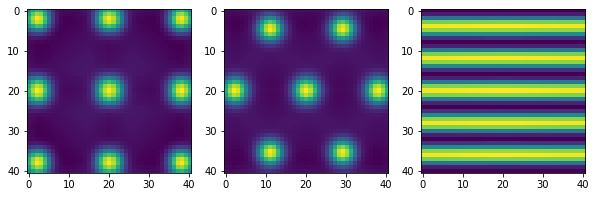

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(square_grid)
plt.subplot(132)
plt.imshow(triangular_grid)
plt.subplot(133)
plt.imshow(lines)

In [5]:
pers = CubicalPersistence()
data = np.vstack([(square_grid,triangular_grid,lines)])
dgms = pers.fit_transform(data)

In [6]:
pairwised = dg.PairwiseDistance('bottleneck')
distances = pairwised.fit_transform(dgms)
distances

array([[0.        , 0.51494502, 1.08299744],
       [0.5146572 , 0.        , 1.08352583],
       [1.08451175, 1.08349461, 0.        ]])

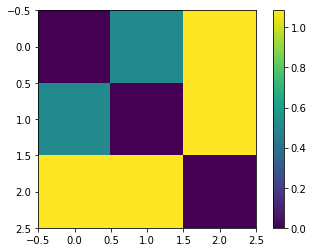

In [7]:
plt.imshow(distances)
plt.colorbar()